In [1]:
import tensorflow as tf
import numpy as np
import random
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, LSTM
gpu = tf.config.experimental.list_physical_devices('GPU')[0]

In [6]:
inp = Input((None, 1))
x = LSTM(500, implementation=1)(inp)
end = Dense(1, activation='tanh')(x)
model = Model(inp, end)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, 1)]         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 500)               1004000   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 501       
Total params: 1,004,501
Trainable params: 1,004,501
Non-trainable params: 0
_________________________________________________________________


In [0]:
def sin_batch_gen(batch_size, len = 100):
  while True:
    out_x = np.array([np.arange(0, len * 0.05, 0.05) + random.random() * np.pi * 2 for i in range(0, batch_size)])
    out_in = np.sin(out_x)
    out_pred = np.array([x[-1] for x in out_in])
    out_in = np.array([x[:-1] for x in out_in]).reshape(batch_size, len - 1, 1)
    yield (out_in, out_pred)

In [7]:
model.compile(optimizer='adam', loss='mse')
model.fit_generator(sin_batch_gen(100), steps_per_epoch=5, epochs=40, verbose=1)

Epoch 1/40
5/5 [==============================] - 2s 392ms/step - loss: 0.2260
Epoch 2/40
5/5 [==============================] - 1s 158ms/step - loss: 0.0298
Epoch 3/40
5/5 [==============================] - 1s 146ms/step - loss: 0.0108
Epoch 4/40
5/5 [==============================] - 1s 146ms/step - loss: 0.0075
Epoch 5/40
5/5 [==============================] - 1s 167ms/step - loss: 0.0072
Epoch 6/40
5/5 [==============================] - 1s 155ms/step - loss: 0.0065
Epoch 7/40
5/5 [==============================] - 1s 154ms/step - loss: 0.0058
Epoch 8/40
5/5 [==============================] - 1s 151ms/step - loss: 0.0058
Epoch 9/40
5/5 [==============================] - 1s 154ms/step - loss: 0.0056
Epoch 10/40
5/5 [==============================] - 1s 141ms/step - loss: 0.0048
Epoch 11/40
5/5 [==============================] - 1s 154ms/step - loss: 0.0040
Epoch 12/40
5/5 [==============================] - 1s 145ms/step - loss: 0.0029
Epoch 13/40
5/5 [==============================] 

In [0]:
in_test = np.sin(np.arange(0, 20, 0.05))
out_test = in_test[:100].reshape((1, 100, 1))
#print(out_test)
while len(out_test[0]) < len(in_test):
  out_test = np.append(out_test, model.predict(out_test[-100:])[0][0])
  out_test = out_test.reshape((1, out_test.shape[0], 1))
  if (len(out_test[0]) % 10 == 0):
    print(len(out_test[0]), len(in_test))

out_test = out_test.reshape((out_test.shape[1]))

110 400
120 400
130 400
140 400
150 400
160 400
170 400
180 400
190 400
200 400
210 400
220 400
230 400
240 400
250 400
260 400
270 400
280 400
290 400
300 400
310 400
320 400
330 400
340 400
350 400
360 400
370 400
380 400
390 400
400 400


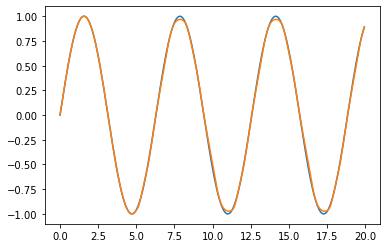

In [0]:
import matplotlib.pyplot as plt
x_values = np.arange(0, len(in_test) * 0.05, 0.05)
plt.plot(x_values, in_test)
plt.plot(x_values, out_test)
plt.show()